<a href="https://colab.research.google.com/github/kpr-03/DeepLearning_TensorFlow/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP fundamentals In  TensorFlow
NLP has the goal of derieveing informatiomn out of natural language(could be sequences text or speech).
Another common term of NLP Problems is squence to sequence problems(seq2seq)

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b41b1499-1244-6a1d-8890-fe0f895aed95)


In [3]:
!wget https://raw.githubusercontent.com/kpr-03/DeepLearning_TensorFlow/main/extras/helper_functions.py

--2023-09-27 08:23:59--  https://raw.githubusercontent.com/kpr-03/DeepLearning_TensorFlow/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10852 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.60K  --.-KB/s    in 0s      

2023-09-27 08:23:59 (119 MB/s) - ‘helper_functions.py’ saved [10852/10852]



In [4]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

# Get a text dataset
The data set we going toi use is Kaggle's introduction to NLP dataset(text samples of Tweets labelled as disaster or not disaster).

see the original source here: https://www.kaggle.com/competitions/nlp-getting-started


In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

#unzip_data
unzip_data("nlp_getting_started.zip")

--2023-09-27 08:24:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-09-27 08:24:05 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualize a text dataset

To visualize our text samples,we first have to read them in,one way to do so would be to use Python : https://realpython.com/working-with-files-in-python/

But i prefer to get visual straight away.

So another way to do this is to use pandas...

In [6]:
import pandas as pd
train_df =pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
# shuffle trining dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# What does test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# how many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# How many total samples?
len(train_df),len(test_df)

(7613, 3263)

In [12]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5) # create random indexes
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target = row
    print(f"Target:{target}","(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target:1 (real disaster)
Text:
ALERT! Sandy Hook Elementary School Evacuated After Û÷Bomb ThreatÛª http://t.co/LwLexXjUS8

---

Target:1 (real disaster)
Text:
The Martyrs Who Kept Udhampur Terrorists at Bay Averted a Massacre: It was two youngÛ_ http://t.co/nux5XfPV2d SPSå¨

---

Target:1 (real disaster)
Text:
#?? #?? #??? #??? Suicide bomber kills 15 in Saudi security site mosque - Reuters  http://t.co/LgpNe5HkaO

---

Target:0 (not real disaster)
Text:
Body Bagging Bitches ???? http://t.co/aFssGPnZWi

---

Target:0 (not real disaster)
Text:
Cyclone by Double G would be the cherry on top to this outfit! #OOTD #DoubleGhats http://t.co/JSuHuPz6Vp http://t.co/N5vrFFRbo3

---



### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# use train_test_split to split training data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                            train_df_shuffled["target"].to_numpy(),
                                                            test_size=0.1, # use 10% of training data for validation
                                                            random_state = 42)

In [15]:
# check the lenghts
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# check the first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Converting text into numbers

When Dealing with a text problem,one of the first things you'll have to do before you can build a model is to convert your test to numbers.

There are a few ways  to do this,namely:
* Tokenization - direct mapping(a token could be a word or a character) to number.
* Embedding - create a matrix of feature vector for each token(the size of the feature vector can be defined and this embedding can be learned)

### Text Vectorization (tokenization)

In [17]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [19]:
# Find The average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be(e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode ="int",
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"original text:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

original text:
@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[3324,   22,   12,  165, 1970,   47,   12,   22,    8,   38,   24,
           5,  437,   12,   14]])>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() #get all of the unique words in
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"5 most common words :{top_5_words}")
print(f"5 least common words:{bottom_5_words}")

Number of words in vocab:10000
5 most common words :['', '[UNK]', 'the', 'a', 'in']
5 least common words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding,we're going to use tensorflow's embedding layer :https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about our embedding layer:
* `input_dim` = the size of our vocabulary.
* `output_dim` = the size of the output embedding vector,for example,a value of 100 would mean each token gets represented by a vector 100 long
* `input_length`= length of sequences being passed to embedding layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128,# output shape
                             embeddings_initializer ="uniform",
                             input_length =max_length,# this is how ling is the input
                             )
embedding

In [26]:
# get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"original text :\n {random_sentence}\n\nEmbedded Version:")


#Embed the raqndom sentence(turn it into dense vector of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text :
 Siren Test complete :: The test has concluded

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0418299 ,  0.03481231, -0.01087658, ..., -0.00868238,
          0.02495039,  0.01109957],
        [ 0.01206817,  0.03068273,  0.02941463, ..., -0.03637588,
         -0.03031088,  0.00377312],
        [ 0.04858187,  0.00302183,  0.03170612, ...,  0.04102507,
          0.04468335,  0.01255797],
        ...,
        [-0.04520587,  0.03407306,  0.02287823, ...,  0.04308141,
          0.04032013,  0.02711226],
        [-0.04520587,  0.03407306,  0.02287823, ...,  0.04308141,
          0.04032013,  0.02711226],
        [-0.04520587,  0.03407306,  0.02287823, ...,  0.04308141,
          0.04032013,  0.02711226]]], dtype=float32)>

In [27]:
# check out single token's embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.0418299 ,  0.03481231, -0.01087658,  0.00263623,  0.03017018,
         0.01899493, -0.04797152, -0.04473748,  0.0025203 ,  0.01714562,
        -0.0436183 , -0.03596886, -0.00380784,  0.04485936,  0.04736631,
        -0.03895045,  0.04160949,  0.04918763, -0.03924646, -0.04169746,
         0.00626098, -0.02520999,  0.03603048,  0.02959305, -0.02270989,
        -0.01793369, -0.02463965, -0.03611566, -0.0012287 , -0.01981661,
         0.01795199, -0.04578079, -0.04318459,  0.01578495,  0.03052068,
         0.01477373, -0.01069814, -0.01005477,  0.03653138,  0.00453277,
        -0.00781973, -0.01480033,  0.02701073, -0.0141817 ,  0.01987154,
        -0.00359104,  0.04710929, -0.01110502,  0.04519845,  0.01189128,
        -0.00422602, -0.02355375,  0.00337219, -0.0257265 ,  0.01277647,
        -0.01962605,  0.03352961,  0.03819959,  0.02469018, -0.03106613,
         0.03171522,  0.02172111, -0.0466683 , -0.04872086, -0.00911149,
  

### Modelling a text dataset(running a series of experiments)

Now we've got a way to turn our text sequences into numbers,
it's time to start building a series of modelling experiments.

We'll start a baseline and move on from there.

* Model O : Navie Bayes (baseline),this is from Sklearn ML map :https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model(RNN)
* Model 4: Biderctional-LSTM model(RNN)
* Model 5: 1D Convolutional neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor(using tranfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of these?

Use the standard steps in modelling with tensorflow:
* Create a model
* Build a model
* Fit a model
* Evaluate a model

### Model 0: Getting a baseline

As with all machine learning modelling experiments,it's important to create baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline,we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> 🔑 **Note:** It's common practice to use non-DL algorithms as baseline because of their speed and later using DL to see if you can improve upon them.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()), #Convert words to numbers using tfidf
    ("clf",MultinomialNB()) #model the text
])


# Fit the pipeline to training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# Evaluate our baseline model
baseline_score =model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of:{baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of:79.27%


In [30]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### creating an evaluation function for our model experiments
We could evaluate all of our model's predictions with different metrics every time,however,this will be cumbersome and could be easily fixed with a function.

Let's create one to compare model's predictions with the truth's labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-Score

> For a deep overview of many different evaluation methods, see the Sklearn documentation : https://scikit-learn.org/stable/modules/model_evaluation.html


In [31]:
# function to evaluate : accuracy,precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  """
  Calculate model accuracy,precision,recall and f1 score of a binary classification

  """
  #claculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred) * 100
  # calculate model precision,recall and f1-score using "weighted" average
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average ="weighted" )
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall":model_recall,
                   "f1":model_f1}
  return model_results

In [32]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A Simple dense model

In [33]:
# create a tensorbioard callback (need to create a new one fr each model)
from helper_functions import create_tensorboard_callback

# create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [34]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
#x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
x=layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model


In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [36]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])


Saving TensorBoard log files to: model_logs/simple_dense_model/20230927-082412
Epoch 1/5
215/215 [==============================] - 28s 94ms/step - loss: 0.6358 - accuracy: 0.6577 - val_loss: 0.5725 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4701 - accuracy: 0.8219 - val_loss: 0.4812 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3434 - accuracy: 0.8733 - val_loss: 0.4581 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2603 - accuracy: 0.9070 - val_loss: 0.4606 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2000 - accuracy: 0.9333 - val_loss: 0.4731 - val_accuracy: 0.7835


In [38]:
# check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7835


[0.47306427359580994, 0.7834645509719849]

In [39]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [40]:
# look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.3209716 ],
       [0.7419488 ],
       [0.99481237],
       [0.05221209],
       [0.2633412 ],
       [0.96982354],
       [0.9412753 ],
       [0.9888052 ],
       [0.9071481 ],
       [0.12613335]], dtype=float32)

In [41]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [42]:
# convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [43]:
# calculate  our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7875988615317319,
 'recall': 0.7834645669291339,
 'f1': 0.7806382038884261}

In [44]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [45]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [46]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
# Model_1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Get the weight matrix of embedding layer
# (these are numerical represntations of each token in our training data,which have been learned for -5 epochs)
embed_weights= model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim(output_dim of our embedding layer)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens,let's visualize it.

To do so,TnsorFlow has a handy tool called projector :https://projector.tensorflow.org/

And tensorflow also has an incredible guide on word embeddings themselves:https://www.tensorflow.org/text/guide/word_embeddings

In [49]:
# Create embedding files(we got this from tensorflow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# Download files from colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use representation of a previous input to aid the representation of later input.

**Resources:** If you want an overview of the internals of a recurrent neural network,see the following:

> * MIT's sequence modelling lecture : https://www.youtube.com/watch?v=ySEx_Bqxvvo&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

> * Chris Olah's intro to LSTM :https://colah.github.io/posts/2015-08-Understanding-LSTMs/

> * Andrej Kaparthy's the unreasonable effectiveness of recurrent neural networks:http://karpathy.github.io/2015/05/21/rnn-effectiveness/




### Model 2 : LSTM

LSTM = Long Short Term Memory( one of the most popular LSTM cells)

Our Structure of RNN typically looks like this:

`Input(text) -> Tokenize -> Embedding -> Layers(RNNs/dense) -> Output(label probability)`

In [51]:
# Create a LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(64,return_sequences=True)(x) # When you are stacking RNN cells together,you need to set return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")


resorces: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh

In [52]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [53]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [54]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230927-082452
Epoch 1/5
215/215 [==============================] - 17s 56ms/step - loss: 0.3805 - accuracy: 0.8349 - val_loss: 0.4622 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2459 - accuracy: 0.9028 - val_loss: 0.5121 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1747 - accuracy: 0.9329 - val_loss: 0.6590 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1352 - accuracy: 0.9492 - val_loss: 0.7085 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0947 - accuracy: 0.9631 - val_loss: 1.0058 - val_accuracy: 0.7769


In [55]:
# make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.8429166e-02],
       [8.3804905e-01],
       [9.9986136e-01],
       [6.6535413e-02],
       [7.2625634e-04],
       [9.9982446e-01],
       [8.3090973e-01],
       [9.9997401e-01],
       [9.9996328e-01],
       [3.9615914e-01]], dtype=float32)

In [56]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
# calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7805885493126917,
 'recall': 0.7769028871391076,
 'f1': 0.774064384984916}

In [58]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 3: GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM call but has less parameters.

In [59]:
# Build an RNN using The GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
# x=layers.GRU(64,return_sequences=True)(x) # if you want to stack recurrent layers on top of each other,you need return_sequences=True
# x=layers.LSTM(64)
# x=layers.GRU(64)(x)
# x=layers.Dense(64,activation="relu")(x)
# x=layers.GlobalAveragePooling1D()(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [60]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [61]:
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [62]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230927-082523
Epoch 1/5
215/215 [==============================] - 16s 64ms/step - loss: 0.2099 - accuracy: 0.9145 - val_loss: 0.6882 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1009 - accuracy: 0.9653 - val_loss: 0.7406 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0769 - accuracy: 0.9712 - val_loss: 0.8756 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0716 - accuracy: 0.9712 - val_loss: 1.0137 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0526 - accuracy: 0.9766 - val_loss: 1.1423 - val_accuracy: 0.7730


In [63]:
# Make some predictions with our GRU model
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.2836808e-03],
       [8.5406858e-01],
       [9.9920231e-01],
       [1.1636986e-01],
       [1.3603958e-04],
       [9.9933618e-01],
       [8.8468742e-01],
       [9.9984694e-01],
       [9.9961877e-01],
       [5.6675309e-01]], dtype=float32)

In [64]:
# convert the model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [65]:
# calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7770640736660165,
 'recall': 0.7729658792650919,
 'f1': 0.7698502254147366}

### Model 4 : Bidirectional RNN

Noraml RNN's go from left to right(just like you'd read an English sentence)however,biredirectional RNN goes from righht to left as well as left to right.

In [66]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
#x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")


In [67]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [68]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [69]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230927-082606
Epoch 1/5
215/215 [==============================] - 18s 65ms/step - loss: 0.1326 - accuracy: 0.9476 - val_loss: 0.9406 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0632 - accuracy: 0.9715 - val_loss: 1.0240 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0497 - accuracy: 0.9771 - val_loss: 1.1434 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0477 - accuracy: 0.9780 - val_loss: 1.1722 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0413 - accuracy: 0.9806 - val_loss: 1.3789 - val_accuracy: 0.7730


In [70]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[5.8440291e-03],
       [6.0890919e-01],
       [9.9994850e-01],
       [1.6532783e-01],
       [8.4999419e-06],
       [9.9908566e-01],
       [5.1265794e-01],
       [9.9999535e-01],
       [9.9999118e-01],
       [1.8503931e-01]], dtype=float32)

In [71]:
# convert the pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [72]:
# calculate the results of our bidirectional model
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'precision': 0.7770640736660165,
 'recall': 0.7729658792650919,
 'f1': 0.7698502254147366}

In [73]:
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7770640736660165,
 'recall': 0.7729658792650919,
 'f1': 0.7698502254147366}

### Convolutional Neural Networks for Text(and other type of sequences)
We've used CNNs for images but images are typically 2D(height x Width)...however,our text data is 1D.

Previously,we've Conv2D for ouer image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences(in our case,text):

```
Inputs(text) -> Tokenization -> Embedding -> layer(s)(typically Conv1D + pooling) -> Outputs(class probabilities)
```

### Model 5 : Conv1D

For different expanations of paramters see:
* https://poloclub.github.io/cnn-explainer/(this is for 2D but can relate to 1D)
* Difference between "same" and "valid":https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [74]:
# test out our embedding layer,Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentencew"])) # turn target sequence into embedding
conv_1d =layers.Conv1D(filters=64,
                       kernel_size=5,# this is also referred to as ngrams of 5(meaning bit looks at 5 words at a time)
                       strides = 1, # default
                       activation="relu",
                       padding="same")

conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important features with the highest value"

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 64]), TensorShape([1, 64]))

In [75]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04133125,  0.01811184, -0.0443433 , ..., -0.0461466 ,
         -0.03196493, -0.03589702],
        [-0.01169366, -0.00166315, -0.03030943, ..., -0.06478784,
         -0.02402321, -0.03358959],
        [-0.06958983,  0.01261439, -0.01845514, ..., -0.03158265,
         -0.02480288, -0.03951636],
        ...,
        [-0.05665342,  0.10580657, -0.02329941, ..., -0.02298701,
         -0.02252954, -0.00562018],
        [-0.05665342,  0.10580657, -0.02329941, ..., -0.02298701,
         -0.02252954, -0.00562018],
        [-0.05665342,  0.10580657, -0.02329941, ..., -0.02298701,
         -0.02252954, -0.00562018]]], dtype=float32)>

In [76]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 64), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.06104088,
         0.00329147, 0.00645757, 0.01489108, 0.03084242, 0.01416488,
         0.05468788, 0.03421469, 0.02654385, 0.02831676, 0.10043512,
         0.        , 0.01050543, 0.00595779, 0.        , 0.03304449,
         0.        , 0.11562026, 0.0770065 , 0.00671394, 0.        ,
         0.        , 0.04570216, 0.        , 0.        , 0.        ,
         0.04507933, 0.01912281, 0.        , 0.03779475, 0.10132565,
         0.01061779, 0.        , 0.00103265, 0.        , 0.01021391,
         0.        , 0.        , 0.04052006, 0.04199293, 0.03708102,
         0.00844043, 0.05215339, 0.        , 0.02656278, 0.        ,
         0.        , 0.00282335, 0.03660585, 0.        , 0.00280459,
         0.05374432, 0.        , 0.        , 0.        , 0.01450018,
         0.        , 0.        , 0.        , 0.02384363],
        [0.        , 0.        , 0.        , 0.        , 0.  

In [77]:
max_pool_output

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[0.05924022, 0.05806538, 0.0748714 , 0.05038953, 0.06104088,
        0.15409662, 0.12675428, 0.10666718, 0.03084242, 0.04862469,
        0.11689363, 0.0989674 , 0.05993688, 0.07580803, 0.19645303,
        0.        , 0.12835862, 0.1130389 , 0.04407856, 0.11751292,
        0.04239302, 0.22234224, 0.14309764, 0.07180376, 0.07668243,
        0.027831  , 0.05136659, 0.06209628, 0.        , 0.07411893,
        0.10297941, 0.13051789, 0.        , 0.05239331, 0.14100292,
        0.10867787, 0.0621738 , 0.1101533 , 0.10096696, 0.080614  ,
        0.02035095, 0.0797276 , 0.04052006, 0.06827395, 0.09871018,
        0.04401735, 0.05658991, 0.        , 0.12633939, 0.02106003,
        0.05363753, 0.04091586, 0.12071943, 0.02017564, 0.02144314,
        0.05374432, 0.06264163, 0.        , 0.02743983, 0.04838369,
        0.06909876, 0.06326952, 0.02900446, 0.08546434]], dtype=float32)>

In [78]:
# create 1-dimensional convolutional layer to model sequence
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x= layers.Conv1D(filters=64,
                 kernel_size=5,
                 strides=1,
                 activation="relu",
                 padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
#x= layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5= tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

# compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 1)              

In [79]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230927-082651
Epoch 1/5
215/215 [==============================] - 20s 72ms/step - loss: 0.1529 - accuracy: 0.9527 - val_loss: 0.8595 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0761 - accuracy: 0.9717 - val_loss: 0.9911 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0626 - accuracy: 0.9785 - val_loss: 1.0248 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0544 - accuracy: 0.9790 - val_loss: 1.1049 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0507 - accuracy: 0.9806 - val_loss: 1.1166 - val_accuracy: 0.7428


In [80]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 6ms/step


array([[3.4403089e-01],
       [9.3952477e-01],
       [9.9995685e-01],
       [1.1043335e-01],
       [1.7748977e-06],
       [9.9170506e-01],
       [9.4509929e-01],
       [9.9996865e-01],
       [9.9999928e-01],
       [7.5819945e-01]], dtype=float32)

In [81]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 74.2782152230971,
 'precision': 0.7424171713690514,
 'recall': 0.7427821522309711,
 'f1': 0.7425174070332562}

In [83]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 6: TensorFlow Hub Pretarined Sentence Encoder

Now we've built a few of our models,let;s try and use transfer learning for NLP,specifically using TEnsorFlow Hub's Unviversal Senetence Encoder : https://tfhub.dev/google/universal-sentence-encoder/4

In [84]:
sample_sentence

"There's a flood in my street!"

In [85]:
import tensorflow_hub as hub
embed =hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence ,it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [86]:
embed_samples[0].shape

TensorShape([512])

In [87]:
# create a keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [88]:
# Create model using sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid",name="output_layer")
],name="model_6_USE")

# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [89]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230927-082802
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5090 - accuracy: 0.7780 - val_loss: 0.4493 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4150 - accuracy: 0.8161 - val_loss: 0.4348 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4013 - accuracy: 0.8215 - val_loss: 0.4307 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3922 - accuracy: 0.8275 - val_loss: 0.4312 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3852 - accuracy: 0.8297 - val_loss: 0.4264 - val_accuracy: 0.8189


In [90]:
# Make predictions with USE Tf Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.17459482],
       [0.81551915],
       [0.9879231 ],
       [0.2074521 ],
       [0.765394  ],
       [0.73048383],
       [0.9776759 ],
       [0.9813416 ],
       [0.93374777],
       [0.09575646]], dtype=float32)

In [91]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [92]:
# Calculate model 6 performamnce
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8217760859362779,
 'recall': 0.8188976377952756,
 'f1': 0.8172552520003825}

In [93]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 7 : TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.
To see how our model performs on a smaller dataset,let's practice `model_6` except we'll train it on 10% of the data.

In [94]:
# ## NOTE: making data split like below leads to data leakage(model_7 trained on 10% data,outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET


# # create subsets of  10% of the training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# #train_10_percent.head(),len(train_10_percent)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent),len(train_labels_10_percent)

> 🔑**Note:** Be *very* careful while creating training/val/test splits that you don't leak data across the datasets,otherwise your model evaluation metrics will be wrong.If something looiks too good to be true (a model trained on 10% of data outperformimg the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [95]:
# Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [96]:
# check the number of each lable in updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [100]:
# check the number of targets in our subset of data
train_10_percent["target"].value_counts()

NameError: ignored

In [99]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

to create a model the same as a previous model you've created you can use the  `tf.keras.models.clone_model()`method,see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [101]:
# Let's build a model same as model_6
# model_7 = tf.keras.models.clone_model(model_6)
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid",name="output_layer")
],name="model_7_USE")
# compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()


Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [102]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230927-083457
Epoch 1/5
22/22 [==============================] - 3s 49ms/step - loss: 0.6700 - accuracy: 0.6365 - val_loss: 0.6491 - val_accuracy: 0.6995
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.6006 - accuracy: 0.7883 - val_loss: 0.5924 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 1s 30ms/step - loss: 0.5247 - accuracy: 0.8204 - val_loss: 0.5371 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 1s 30ms/step - loss: 0.4620 - accuracy: 0.8248 - val_loss: 0.5036 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4198 - accuracy: 0.8409 - val_loss: 0.4908 - val_accuracy: 0.7782


In [103]:
# Make predictions with model trained on 10% of data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.21366549],
       [0.6056143 ],
       [0.90791154],
       [0.37987673],
       [0.5644506 ],
       [0.682433  ],
       [0.86915874],
       [0.82079315],
       [0.8509527 ],
       [0.14966072]], dtype=float32)

In [104]:
# turn the pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
# Evaluate mode_7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.82152230971128,
 'precision': 0.7786516618308618,
 'recall': 0.7782152230971129,
 'f1': 0.7769459233664658}

In [ ]:
model_6_results

## Comparing the performance of each of our models

In [106]:
# combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline":baseline_results,
                                 "1_simple_dense":model_1_results,
                                 "2_lstm":model_2_results,
                                 "3_gru":model_3_results,
                                 "4_bidirectional":model_5_results,
                                 "5_conv1s":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder_10_percent":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.346457,0.787599,0.783465,0.780638
2_lstm,77.690289,0.780589,0.776903,0.774064
3_gru,77.296588,0.777064,0.772966,0.769850
4_bidirectional,74.278215,0.742417,0.742782,0.742517
5_conv1s,74.278215,0.742417,0.742782,0.742517
6_tf_hub_use_encoder,81.889764,0.821776,0.818898,0.817255
7_tf_hub_use_encoder_10_percent,77.821522,0.778652,0.778215,0.776946


In [107]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results


,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.783465,0.787599,0.783465,0.780638
2_lstm,0.776903,0.780589,0.776903,0.774064
3_gru,0.772966,0.777064,0.772966,0.769850
4_bidirectional,0.742782,0.742417,0.742782,0.742517
5_conv1s,0.742782,0.742417,0.742782,0.742517
6_tf_hub_use_encoder,0.818898,0.821776,0.818898,0.817255
7_tf_hub_use_encoder_10_percent,0.778215,0.778652,0.778215,0.776946


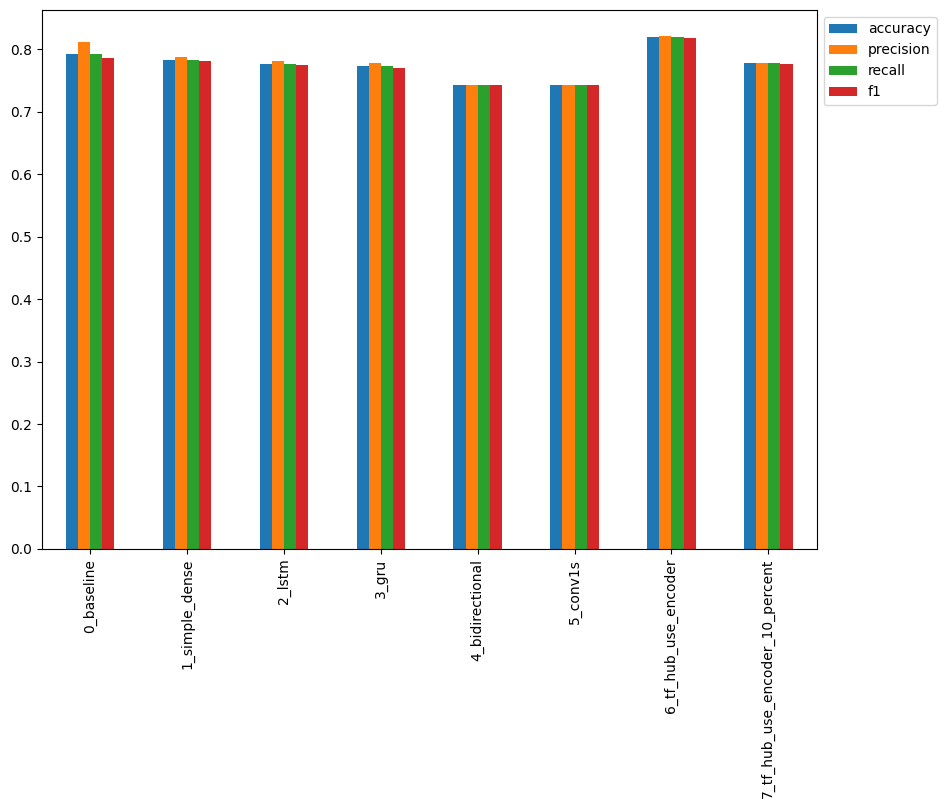

In [108]:
# plot and compare all of model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

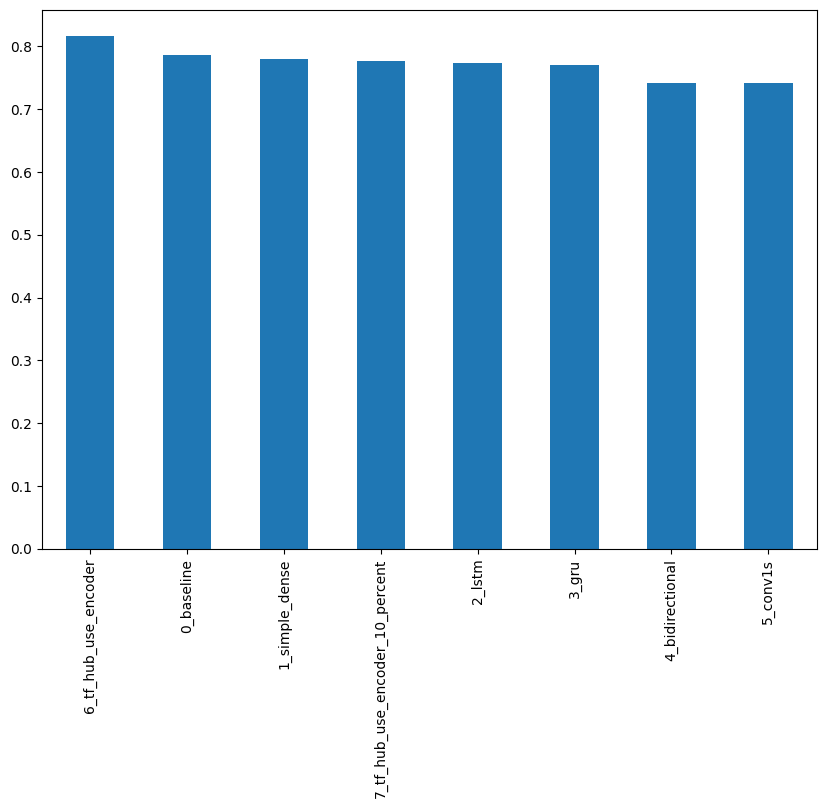

In [110]:
# sort model results by f1-score
all_model_results.sort_values("f1" , ascending=False)["f1"].plot(kind="bar",figsize=(10,7));

## Uploading model training logs to TensorBoard.dev
We can further inspect our model's perfromance using : https://tensorboard.dev/

In [116]:
#  # view tensorBoard logs of transfer learning modelling experiments(plus all of our other models)
#  # upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "NLP Modelling Experipents By Prem" \
#   --description "Comparing multiple different types of model architecture on the Kaggle Tweets text classification dataset" \
#   --one_shot # exit the uploader once uploading is finished

> Now I've ran the cell above,my modelling experiments are visible on TensorBoard.dev:https://tensorboard.dev/experiment/yPHbJkruRuqYFnH3oujTqg/#scalars

In [117]:
# See the previous TensorBoard dev exapmles:
#!tensorboard dev list

In [115]:
# if you need to delete an experiment from TensorBoard,you can run the following:
# !tensorboard dev delete --experiment_id yPHbJkruRuqYFnH3oujTqg

## Saving and loading a trained model
There are two main formats to save a model to in TensorFlow:
1. The HDF5 format.
2. The `savemodel`format(this is the default when using TensorFlow)

In [119]:
# Save TF Hub Sentence Encoder model to HDF5 format.
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
# Load model with custom hub layer(required with HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [123]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4264 - accuracy: 0.8189


[0.4264369308948517, 0.8188976645469666]

Now let's save to `savemodel` format...( dee more on this here:https://www.tensorflow.org/tutorials/keras/save_and_load)

In [124]:
# Save TfF Hub Sentence Encvoder model to SaveModel format(default)
model_6.save("model_6_SaveModel_format")

In [125]:
# load in a model from savemodel format
loaded_model_6_SaveModel_format = tf.keras.models.load_model("model_6_SaveModel_format")

In [126]:
# Evaluate model im SaveModel Format
loaded_model_6_SaveModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4264 - accuracy: 0.8189


[0.4264369010925293, 0.8188976645469666]

In [127]:
# dowmnload files from google colab
from google.colab import files
files.download("model_6_SaveModel_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
model_6.summary()


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


## Finding the most wrong examples

* If our best model still isn't perfect,what examples is it getting wrong?

* And of these wrong examples which one it is getting *most* wrong (those will prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.99(really cloase top 1) and vice versa.

In [129]:
# download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-09-27 10:19:36--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  96.1MB/s    in 10s     

2023-09-27 10:19:47 (87.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/varia

In [130]:
# Import prteviously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [131]:
# make prediction from loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [138]:
# Create DataFrame with validation sentences,validation labels and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                      "target":val_labels,
                      "pred": model_6_pretrained_preds,
                      "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [141]:
# find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [142]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


let's remind ourselves of the target labels...
* 0=not disaster
* 1 = disaster

In [144]:
# check the false positives(model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"Target:{target},Pred :{pred},Prob :{pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target:0,Pred :1.0,Prob :0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target:0,Pred :1.0,Prob :0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target:0,Pred :1.0,Prob :0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target:0,Pred :1.0,Prob :0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target:0,Pred :1.0,Prob :0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target:0,Pred :1.0,Prob :0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target:0,Pred :1

In [147]:
# check the false negatives(model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"Target:{target},Pred :{pred},Prob :{pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target:1,Pred :0.0,Prob :0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target:1,Pred :0.0,Prob :0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target:1,Pred :0.0,Prob :0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target:1,Pred :0.0,Prob :0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target:1,Pred :0.0,Prob :0.04963728412985802
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target:1,Pred :0.0,Prob :0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target:1,Pred :0.0,Prob :0.042086850851774216
Te

## making predictions on test dataset

In [148]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects this as input
  pred = tf.round(pred_prob)
  print(f"Pred : {int(pred)},prob:{pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 172ms/step
Pred : 0,prob:0.49687451124191284
Text:
2 held with heroin in ambulance http://t.co/d9sOwi1G21 http://t.co/OPxmdPIwAu

----

1/1 [==============================] - 0s 128ms/step
Pred : 1,prob:0.9454165101051331
Text:
Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carrying as many as 600 peopleÛ_

----

1/1 [==============================] - 0s 133ms/step
Pred : 0,prob:0.025339337065815926
Text:
Happy birthday bro ?? @Hurricane_Dolce

----

1/1 [==============================] - 0s 92ms/step
Pred : 1,prob:0.9233580231666565
Text:
RICHIE: This was #Calgary yesterday after a crazy #hailstorm! pics via Calgary Herald http://t.co/1oH20qHk2l

----

1/1 [==============================] - 0s 106ms/step
Pred : 0,prob:0.04064905270934105
Text:
My bestfriends are the bomb. ??

----

1/1 [==============================] - 0s 65ms/step
Pred : 0,prob:0.06443239748477936
Text:
? http://t.co/jGRA7oOISN #Reddit Wil

## the Speed/score tradeoff

In [149]:
# let's make a function to measure the time of prediction
import time
def pred_timer(model,samples):
  """
  Times how lomg a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time=end_time-start_time # claculates how lomng prediction took to make
  time_per_pred = total_time/len(samples)
  return total_time,time_per_pred

In [150]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time,model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                           samples = val_sentences)
model_6_total_pred_time,model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.36589092899885145, 0.00048017182283313837)

In [151]:
# caqlculate our baseline model times pe rpred
baseline_total_pred_time,baseline_time_per_pred = pred_timer(model_0,val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.04841750299965497, 6.354003018327425e-05)

In [153]:
# Get results for pretrained GS model
model_6_pretrained_results =calculate_results(y_true=val_labels,
                                              y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

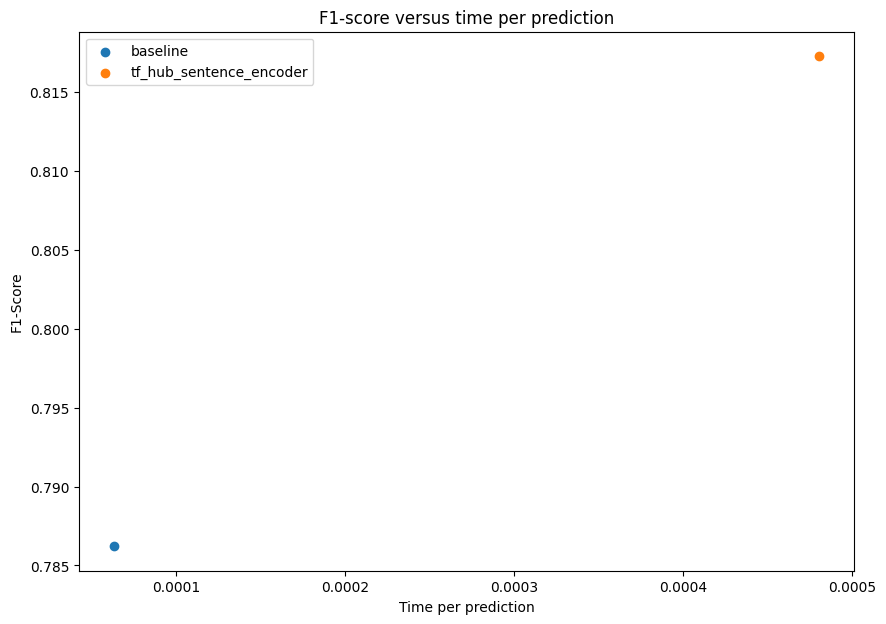

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");